In [1]:
%matplotlib inline
import random,torch
from d2l import torch  as d2l

In [67]:
def synthetic_data(w, b, num_examples):  #@save
    """生成 y = Xw + b + 噪声。"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [89]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-1.2532]) 
label: tensor([8.4624])


In [69]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

IndexError: index 1 is out of bounds for dimension 1 with size 1

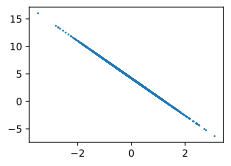

In [70]:
d2l.plt.scatter(features[:, 0].detach().numpy(), labels.detach().numpy(), 1);

In [71]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [81]:
batch_size = 3

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.2391],
        [-0.1055],
        [ 0.8145]]) 
 tensor([[8.4203],
        [4.5621],
        [1.4180]])


In [82]:
'''初始化模型参数'''
w = torch.normal(0, 0.01, size=(1,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [83]:
def linreg(X, w, b):  #@save
    """线性回归模型。"""
    return torch.matmul(X, w) + b

In [84]:
def squared_loss(y_hat, y):  #@save
    """均方损失。"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2 

In [85]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降。"""
    with torch.no_grad():    # 更新的时候不使用使用梯度
        for param in params:
            param -= lr * param.grad / batch_size  #因为l.sum,所以需要/batch_size
            param.grad.zero_()

In [86]:
lr = 0.01
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # `X`和`y`的小批量损失
        # 因为`l`形状是(`batch_size`, 1)，而不是一个标量。`l`中的所有元素被加到一起，
        # 并以此计算关于[`w`, `b`]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():    
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.017565
epoch 2, loss 0.000070
epoch 3, loss 0.000051


In [87]:
X_t = torch.tensor([[1.,2.],[2.,3.],[3.,4.]])
labels_t = torch.tensor([3,4,5])
w_t = torch.tensor([2.,3.], requires_grad = True)
b_t = torch.zeros(1, requires_grad = True)
out = torch.mv(X_t,w_t)+b_t
l = (out-labels_t)**2/2
l.sum().backward()
X_t,w_t,b_t,out,out.sum()

(tensor([[1., 2.],
         [2., 3.],
         [3., 4.]]),
 tensor([2., 3.], requires_grad=True),
 tensor([0.], requires_grad=True),
 tensor([ 8., 13., 18.], grad_fn=<AddBackward0>),
 tensor(39., grad_fn=<SumBackward0>))

In [79]:
w_t.grad,b_t.grad

(tensor([62., 89.]), tensor([27.]))

In [80]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-0.1748], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.1982], grad_fn=<RsubBackward1>)
